In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [3]:
from ikapati.visualization import visualize as vz
from ikapati.data import io

In [4]:
model_dir_path = "../models/7feacba0-2be0-4761-ba49-854067714f3b/"
model_dir = pathlib.Path(model_dir_path)
training_csv_filename = model_dir.joinpath("training.csv")
training_csv = pd.read_csv(training_csv_filename)
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath("all")
sub_dirs = list(filter(lambda x: x.is_dir(), model_dir.iterdir()))

In [5]:
training_csv

,start_time,end_time,activation,model_dir_path,learning_rate,dropout,epochs,batch_size
0,2020-02-08__02_1926,2020-02-08__03_2838,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.050,NaN,20,128
1,2020-02-08__08_2457,2020-02-08__09_3845,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.050,NaN,20,64
2,2020-02-08__19_3845,2020-02-08__19_5751,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.001,NaN,20,100
3,2020-02-08__20_2543,2020-02-08__21_3708,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.001,NaN,20,100
4,2020-02-08__21_5614,2020-02-08__23_0917,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.001,NaN,20,100
5,2020-02-08__23_4632,2020-02-09__01_0035,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.001,NaN,20,64
6,2020-02-09__01_1232,2020-02-09__02_2213,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.001,NaN,20,128
7,2020-02-09__02_2409,2020-02-09__03_3321,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.050,NaN,20,128
8,2020-02-09__04_1552,2020-02-09__04_3637,relu,models/7feacba0-2be0-4761-ba49-854067714f3b/20...,0.001,NaN,20,128


In [14]:
vz.save_metrics_plots_for_training(training_csv_filename)

<Figure size 432x288 with 0 Axes>

In [6]:
def make_paths(paths):
    return list(map(lambda p: pathlib.Path("..", p), paths))

In [7]:
model_dir_paths = make_paths(training_logs["model_dir_path"].values)

In [8]:
def is_checkpoint(item):
    return item.stem.isnumeric()

def get_checkpoints(directory):
    return list(filter(is_checkpoint, list(directory.iterdir())))

def get_best_checkpoint(checkpoints):
    checkpoint_numbers = list(map(lambda x: int(x.stem), checkpoints))
    return np.argmax(checkpoint_numbers) if checkpoint_numbers else None

def get_best_checkpoint_in_directory(directory):
    checkpoints = get_checkpoints(directory)
    best_checkpoint = get_best_checkpoint(checkpoints)
    return checkpoints[best_checkpoint] if best_checkpoint else None

def get_best_checkpoint_files(sub_dirs):
    checkpoint_paths = []
    for sub_dir in sub_dirs:
        items = list(sub_dir.iterdir())
        best_checkpoint = get_best_checkpoint_in_directory(sub_dir)
        if best_checkpoint:
            checkpoint_paths.append(best_checkpoint)
    return checkpoint_paths

In [9]:
def evaluate_model(model_file_path):
    metadata_file_path = model_file_path.parent.joinpath("metadata.json")
    metadata = io.read_metadata(str(metadata_file_path))
    batch_size = metadata["arguments"]["batch_size"]
    test_data_path = train_dir.joinpath("test.tfrecord")
    test_dataset = io.read_dataset(str(test_data_path), batch_size, metadata["dataset"]["num_classes"])
    steps = metadata["dataset"]["file_counts"]["test"] // batch_size
    model = tf.keras.models.load_model(str(model_file_path))
    results = model.evaluate(test_dataset, steps=steps)
    print(results)
    return model, results

In [ ]:
results = []

for model_dir_path in model_dir_paths:
    print(str(model_dir_path))
    model_file_path = get_best_checkpoint_in_directory(model_dir_path)
    if not model_file_path:
        print(f"{str(model_dir_path)} : No model found, skipping.")
        continue
    model, result = evaluate_model(model_file_path)
    results.append([str(model_dir_path), result])
    model = None

../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__02_1926
../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__02_1926 : No model found, skipping.
../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__08_2457
165/165 [==============================] - 41s 248ms/step - loss: 0.4513 - accuracy: 0.8848
[0.4513429146824461, 0.88475376]
../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__19_3845
../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__19_3845 : No model found, skipping.
../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__20_2543
105/105 [==============================] - 31s 299ms/step - loss: 0.1010 - accuracy: 0.9705
[0.10097126775376854, 0.9704762]
../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__21_5614


In [18]:
model = None

In [33]:
model_dir_paths

[PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__02_1926'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__08_2457'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__19_3845'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__20_2543'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__21_5614'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-08__23_4632'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-09__01_1232'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-09__02_2409'),
 PosixPath('../models/7feacba0-2be0-4761-ba49-854067714f3b/2020-02-09__04_1552')]

In [6]:
evaluation = pd.read_csv("../reports/evaluation.csv")

In [8]:
evaluation.iloc[3]

id                              7feacba0-2be0-4761-ba49-854067714f3b
model_file_path    models/7feacba0-2be0-4761-ba49-854067714f3b/20...
batch_size                                                        64
epochs                                                            20
monitor                                                     val_loss
activation                                                      relu
early_stopping                                                 False
architecture                                             inceptionv3
dropout                                                          NaN
learning_rate                                                  0.001
loss                                                       0.0893377
accuracy                                                    0.973485
Name: 3, dtype: object

In [9]:
image_filename = "../Potato-leaf-blight.jpg"

In [10]:
from PIL import Image
im = Image.open(image_filename)

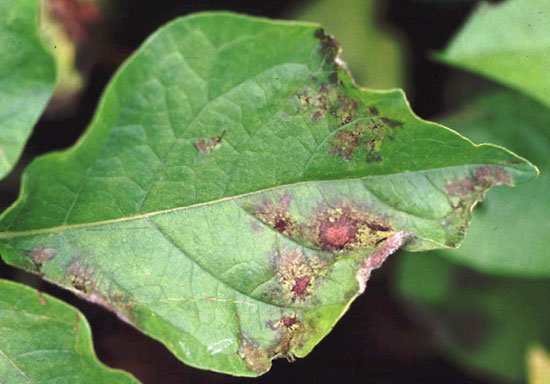

In [11]:
im

In [13]:
resized_im = im.resize((256,256))

In [14]:
resized_im.save("Potato-leaf-blight.jpg")

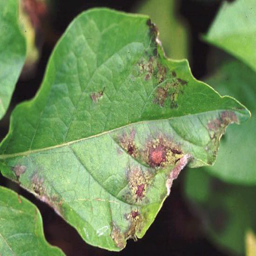

In [15]:
resized_im

In [16]:
! curl -O https://extension.umd.edu/sites/extension.umd.edu/files/resize/_images/programs/grow_it_eat_it/diseases/Septoria/septoria_tomato_l1-250x188.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15990  100 15990    0     0  31414      0 --:--:-- --:--:-- --:--:-- 31352


In [17]:
! ls

1.0-agj-data-exploration.ipynb	   4.1-agj-evaluate-Potato.ipynb
2.0-agj-image-preprocessing.ipynb  4.1-agj-evaluate-Tomato.ipynb
2.1-agj-image-preprocessing.ipynb  4.2-agj-evaluate-Apple.ipynb
3.0-agj-training.ipynb		   4.2-agj-evaluate-Tomato.ipynb
3.1-agj-training-batch.ipynb	   5.0-agj-evaluation-all.ipynb
4.0-agj-evaluation.ipynb	   Potato-leaf-blight.jpg
4.1-agj-evaluate-Apple.ipynb	   septoria_tomato_l1-250x188.jpg
4.1-agj-evaluate-Corn.ipynb


In [18]:
im = Image.open("septoria_tomato_l1-250x188.jpg")

In [19]:
resized_im = im.resize((256, 256))

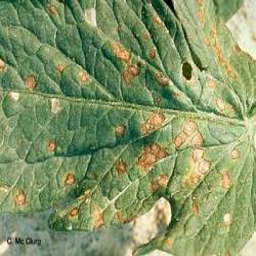

In [20]:
resized_im

In [21]:
resized_im.save("septoria_tomato_l1-250x188.jpg")

In [22]:
# http://blogs.cornell.edu/livegpath/gallery/tomato/tomato-septoria-leaf-spot/

In [23]:
! curl -O http://www.hort.cornell.edu/livegpath/images/septoria_tom_seedlings1x1200.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  312k  100  312k    0     0   444k      0 --:--:-- --:--:-- --:--:--  443k


In [24]:
im = Image.open("septoria_tom_seedlings1x1200.jpg")
resized_im = im.resize((256,256))
resized_im.save("septoria_tom_seedlings1x1200.jpg")

In [25]:
# https://apps.extension.umn.edu/garden/diagnose/plant/vegetable/tomato/leavesspots.html

In [26]:
! curl -O https://apps.extension.umn.edu/garden/diagnose/plant/images/tomato/diseases/septoria2_600px.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55849  100 55849    0     0  85921      0 --:--:-- --:--:-- --:--:-- 85789


In [27]:
im = Image.open("septoria2_600px.jpg")
resized_im = im.resize((256,256))
resized_im.save("septoria2_600px.jpg")

In [28]:
! curl -O https://apps.extension.umn.edu/garden/diagnose/plant/images/tomato/diseases/earlyblight2_600px.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   98k  100   98k    0     0   106k      0 --:--:-- --:--:-- --:--:--  106k


In [29]:
im = Image.open("earlyblight2_600px.jpg")
resized_im = im.resize((256,256))
resized_im.save("earlyblight2_600px.jpg")